## Python dependencies

In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data loading & cleaning 

In [97]:
df_1 = pd.read_csv("raw_data/connectivity1458292421ttyUSB0.csv",
                  names=["type", "MAC", "seq", "wraps", "timestamp", "RSSI", "LQI"],)
df_2 = pd.read_csv("raw_data/connectivity1459473036ttyUSB0.csv",
                  names=["type", "MAC", "seq", "wraps", "timestamp", "RSSI", "LQI"],)

# We apply the same cleaning on all data sets
for num, d in enumerate([df_1, df_2]):
    d["type"] = d["type"].map({"0xaa": "rPi", "0x55": "mote"})
    # It's better to have a Not a Number (NaN) rather than 0 to avoid confusion.
    d["timestamp"] = d["timestamp"].replace({0: np.nan})
    # Timestamp are only delta. No date sync is available.
    d['timestamp'] = d["timestamp"] - d["timestamp"].min()
    d["origin"] = num

df = pd.concat([df_1, df_2])

## Motes in action

We can see all the motes in actions:

In [88]:
df_1[df_1["type"] == "mote"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1'], dtype=object)

In [28]:
df_2[df_2["type"] == "mote"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64'], dtype=object)

## RaspberryPi in action

In [35]:
df_1[df_1["type"] == "rPi"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a',
       '0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43'], dtype=object)

In [36]:
df_2[df_2["type"] == "rPi"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a',
       '0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43'], dtype=object)

## RSSI summary

In [67]:
df.RSSI.describe()

count    343002.000000
mean        -34.238876
std           3.266245
min         -61.000000
25%         -37.000000
50%         -33.000000
75%         -31.000000
max         -28.000000
Name: RSSI, dtype: float64

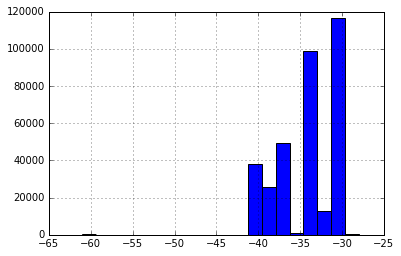

In [74]:
df.RSSI.hist(bins=20)

## LQI summary

In [68]:
df.LQI.describe()

count    343002.000000
mean        107.926432
std           0.330771
min          66.000000
25%         108.000000
50%         108.000000
75%         108.000000
max         108.000000
Name: LQI, dtype: float64

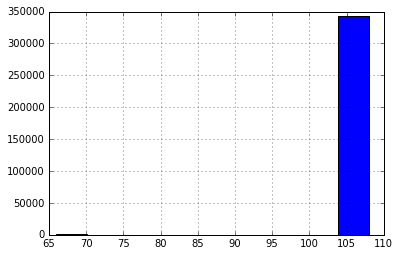

In [76]:
df.LQI.hist()

## Which data origin is the first in time?

In [131]:
df.groupby(["MAC", "seq"], sort=True)["timestamp"].unique()

MAC                                   seq  
0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1  512      [1285.0]
                                      513      [1286.0]
                                      514      [1286.0]
                                      586      [1104.0]
                                      587      [1105.0]
                                      588      [1106.0]
                                      589      [1107.0]
                                      590      [1108.0]
                                      591      [1109.0]
                                      592      [1110.0]
                                      593      [1111.0]
                                      594      [1112.0]
                                      595      [1113.0]
                                      596      [1114.0]
                                      597      [1115.0]
                                      598      [1116.0]
                                      599      [1117.0]
    